<a href="https://colab.research.google.com/github/rosiekwon/smart_healthcare/blob/main/WEEK%203/Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. CNN(convolutional Neural Networks)

- 이미지의 특징을 추출하고 학습할 수 있는 layer
- 이미지 데이터의 패턴을 학습하고 이미지를 분류할 수 있다.

<img src='https://miro.medium.com/max/1400/1*vkQ0hXDaQv57sALXAJquxA.jpeg'>

### Filter parameters

- Receptive field; 필터가 한번에 보는 영역
- kernel size; 필터의 크기
- Stride; 필터가 움직인 거리
- Zeropadding; stride에 따라 input size가 맞지 않을 때 사용

## 2. Layer

### Max pooling layer
이미지의 크기를 유지한 채 Fully connected layer로 간다면 연산량이 기하급수적으로 증가하기 때문에 Kernel size를 작게 하면서도 더 넓은 영역의 이미지를 학습할 수 있도록 만드는 방법이다

-> 이미지의 크기를 줄이게 된다


### Batch Normalization layer


### Dropout layer
- input과 상관없이 노드를 random하게 추출하여 출력을 0으로 만드는 방법이다
- overfitting을 방지하기 위해 노드를 random하게 삭제하는 기법이다


### Dropconnect layer
- Dropout layer와 비슷하지만 weight를 비활성화 시키고 node는 살아있는 방식이다. 생략되는 weight에 따라 connection이 사라진다.


### Flatten, Dense layer

- Flatten : Dense와 연결하기 위해서 갖고 있는 feature의 shape을 변경해야한다
- Dense : 노드들을 연결하고 학습한 layer

## 3. Hyper parameter

* 파라미터 : 딥러닝 모델 안에서 학습되며 업데이트 되는 weight나 bias
* hyper parameter : 사용자가 학습을 효율적으로 진행하기 위해 휴리스틱한 방식으로 모델에 설정하는 변수

i.e. learning rate, batch size, epoch, layer 설계 등



---



## 1. Import library

In [1]:
import numpy as np
import os, matplotlib
from matplotlib import pyplot as plt

### Tensorflow 2.0 ###
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import Input
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import metrics
from tensorflow.keras import regularizers
from tensorflow.keras import utils

In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## 2. Load Data

In [3]:
(x_train, y_train), (x_test, y_test)= tf.keras.datasets.mnist.load_data(path='minist.npz')
print(x_train.shape, y_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)


In [4]:
x_train_list = []
x_test_list = []
for i, i_ in enumerate(x_train[:1000]):
    arr = np.zeros(shape=(32, 32))
    arr[:28,:28] = x_train[i]
    x_train_list.append(arr)
for i, i_ in enumerate(x_test[:300]):
    arr = np.zeros(shape=(32, 32))
    arr[:28,:28] = x_test[i]
    x_test_list.append(arr)

x_train1 = np.expand_dims(np.array(x_train_list), axis=-1)
x_test1 = np.expand_dims(np.array(x_test_list), axis=-1)
print(x_train1.shape, x_test1.shape)

(1000, 32, 32, 1) (300, 32, 32, 1)


In [5]:
y_train_list = []
y_test_list = []
for i, i_ in enumerate(y_train[:1000]):
    zero = [0]*10
    zero[i_] = 1
    y_train_list.append(zero)

for i, i_ in enumerate(y_test[:300]):
    zero = [0]*10
    zero[i_] = 1
    y_test_list.append(zero)    
    
y_train1 = np.array(y_train_list)
y_test1 = np.array(y_test_list)
print(y_train1.shape, y_test1.shape)

(1000, 10) (300, 10)


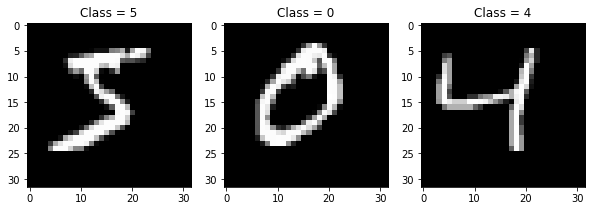

In [6]:
plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(x_train1[i][...,0], cmap='gray')
    plt.title('Class = {}'.format(y_train[i]))

## 3. Model
* CONV-BN-ACT-POOL 구조

In [7]:
first_layer= Input(shape=(32,32,1))

In [8]:
#데이터의 특징을 추출할 Convolution 레이어
second_layer = layers.Conv2D(filters=8, kernel_size=(3, 3), activation=None, padding='same')(first_layer)

In [9]:
#Batch Normalization 레이어 (정규화)
third_layer = layers.BatchNormalization()(second_layer)

In [10]:
#Activation function 레이어
fourth_layer = layers.Activation('relu')(third_layer)

In [11]:
#이미지 사이즈를 줄여주는 Pooling 레이어
fifth_layer = layers.MaxPool2D(strides=(2, 2))(fourth_layer)

In [12]:
#Flatten 레이어
sixth_layer  = layers.Flatten()(fifth_layer)

In [13]:
#이전 계층의 모든 뉴런을 연결해주는 Fully connected(Dense) 레이어
seventh_layer = layers.Dense(100, activation = 'relu')(sixth_layer)

In [14]:
#Dropout 레이어를 활용해 일부 뉴런들을 무작위로 학습에서 배제
eighth_layer = layers.Dropout(0.25)(seventh_layer) 

In [15]:
#최종 결과물 출력 레이어
final_layer =  layers.Dense(10, activation='sigmoid')(eighth_layer)

In [17]:
model = Model(first_layer, final_layer)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 8)         80        
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 8)        32        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 8)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 8)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 2048)              0   

##4. Training Model

In [20]:
model.compile(loss=losses.CategoricalCrossentropy(), optimizer = optimizers.Adam(lr=1e-4), metrics=['accuracy'])
#class가 3개 이상인 경우 categoricalCrossentropy 사용 / 2개인 경우 binary_crossentropy 사용

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [22]:
history = model.fit(x_train1, y_train1, epochs=20, batch_size = 32, validation_data=(x_test1,y_test1),shuffle=True)

Epoch 1/20
32/32 [==============================] - 8s 12ms/step - loss: 2.2088 - accuracy: 0.2710 - val_loss: 1.6242 - val_accuracy: 0.4400
Epoch 2/20
32/32 [==============================] - 0s 5ms/step - loss: 1.3848 - accuracy: 0.5640 - val_loss: 1.1571 - val_accuracy: 0.6267
Epoch 3/20
32/32 [==============================] - 0s 5ms/step - loss: 1.0804 - accuracy: 0.6810 - val_loss: 0.9238 - val_accuracy: 0.7033
Epoch 4/20
32/32 [==============================] - 0s 5ms/step - loss: 0.8814 - accuracy: 0.7440 - val_loss: 0.7852 - val_accuracy: 0.7600
Epoch 5/20
32/32 [==============================] - 0s 5ms/step - loss: 0.7115 - accuracy: 0.7940 - val_loss: 0.7046 - val_accuracy: 0.7967
Epoch 6/20
32/32 [==============================] - 0s 5ms/step - loss: 0.6494 - accuracy: 0.8090 - val_loss: 0.6308 - val_accuracy: 0.8133
Epoch 7/20
32/32 [==============================] - 0s 5ms/step - loss: 0.5389 - accuracy: 0.8510 - val_loss: 0.5790 - val_accuracy: 0.8300
Epoch 8/20
32/32 [=

## 5. Test Results

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [24]:
epochs = range(1,len(acc)+1)

정확도와 손실함수 그래프 그리기

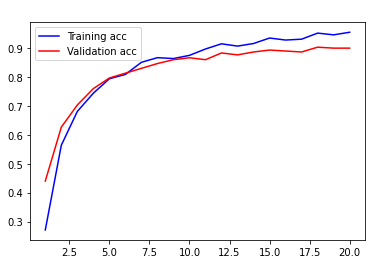

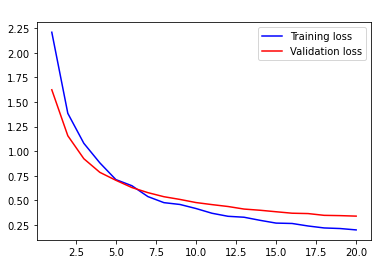

In [25]:
plt.plot(epochs, acc, 'b', color='blue', label='Training acc')
plt.plot(epochs, val_acc, 'b', color='red', label='Validation acc')
plt.title('Training and validation accuracy', color='w')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', color='blue', label='Training loss')
plt.plot(epochs, val_loss, 'b', color='red', label='Validation loss')
plt.title('Training and validation loss', color='w')
plt.legend()

plt.show()